In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

#Train-Test Split
from sklearn.model_selection import train_test_split

#Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

#### Dataset Initial Exploration

In [3]:
df=pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\loans_train.csv", index_col = "Loan_ID")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0000,NaN,360.0000,1.0000,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0000,128.0000,360.0000,1.0000,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0000,66.0000,360.0000,1.0000,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0000,120.0000,360.0000,1.0000,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0000,141.0000,360.0000,1.0000,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.0000,614.0000,592.0000,600.0000,564.0000
mean,5403.4593,1621.2458,146.4122,342.0000,0.8422
std,6109.0417,2926.2484,85.5873,65.1204,0.3649
min,150.0000,0.0000,9.0000,12.0000,0.0000
25%,2877.5000,0.0000,100.0000,360.0000,1.0000
50%,3812.5000,1188.5000,128.0000,360.0000,1.0000
75%,5795.0000,2297.2500,168.0000,360.0000,1.0000
max,81000.0000,41667.0000,700.0000,480.0000,1.0000


In [4]:
df.shape

(614, 12)

In [5]:
df["Loan_Status"].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

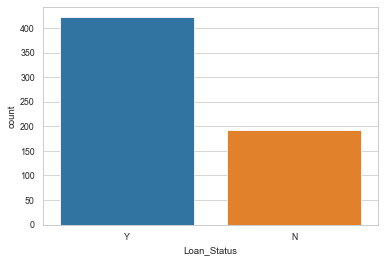

In [6]:
sns.countplot(data = df, x = "Loan_Status")

### Data Quality/EDA

In [7]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
total

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Credit_History'].value_counts()


1.0000    475
0.0000     89
Name: Credit_History, dtype: int64

In [10]:
df.dropna(subset = ['Credit_History','Dependents','Gender','Married'], axis = 0, inplace = True)
df.isnull().sum().sort_values(ascending=False)

## Object Columns

Self_Employed        26
LoanAmount           19
Loan_Amount_Term     13
Gender                0
Married               0
Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Data impute

In [11]:
df['LoanAmount'].fillna(np.mean(df['LoanAmount']), inplace = True)
df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']), inplace = True)
df.isnull().sum().sort_values(ascending=False)

# Float Columns

Self_Employed        26
Gender                0
Married               0
Dependents            0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Self_Employed'].value_counts()

No     441
Yes     70
Name: Self_Employed, dtype: int64

In [13]:
df['Self_Employed'].fillna('No', inplace = True)
df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             537 non-null    object 
 1   Married            537 non-null    object 
 2   Dependents         537 non-null    object 
 3   Education          537 non-null    object 
 4   Self_Employed      537 non-null    object 
 5   ApplicantIncome    537 non-null    int64  
 6   CoapplicantIncome  537 non-null    float64
 7   LoanAmount         537 non-null    float64
 8   Loan_Amount_Term   537 non-null    float64
 9   Credit_History     537 non-null    float64
 10  Property_Area      537 non-null    object 
 11  Loan_Status        537 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 54.5+ KB


#### Univariate Analysis - check distribution of numeric variables


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

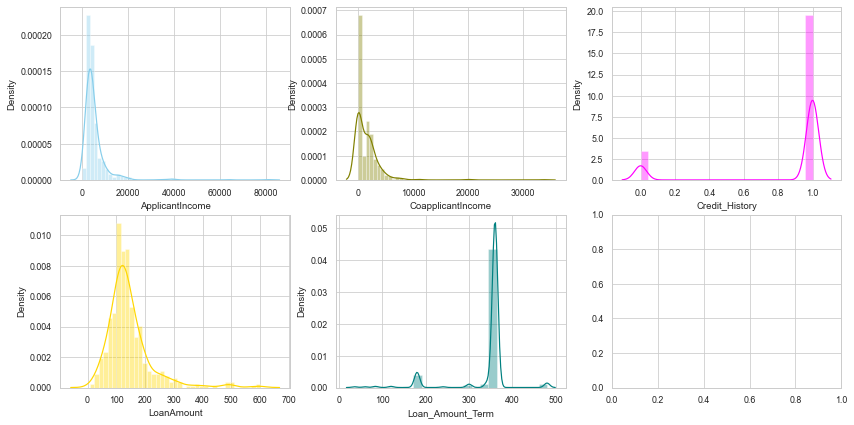

In [15]:
f, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.distplot(df["ApplicantIncome"] , color="skyblue", ax=axes[0, 0])
sns.distplot(df["CoapplicantIncome"] , color="olive", ax=axes[0, 1])
sns.distplot(df["LoanAmount"] , color="gold", ax=axes[1, 0])
sns.distplot(df["Loan_Amount_Term"] , color="teal", ax=axes[1, 1], kde_kws={'bw': 0.1})
sns.distplot(df["Credit_History"] , color="magenta", ax=axes[0, 2], kde_kws={'bw': 0.1})

#### Univariate Analysis - check distribution of categorical variables

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

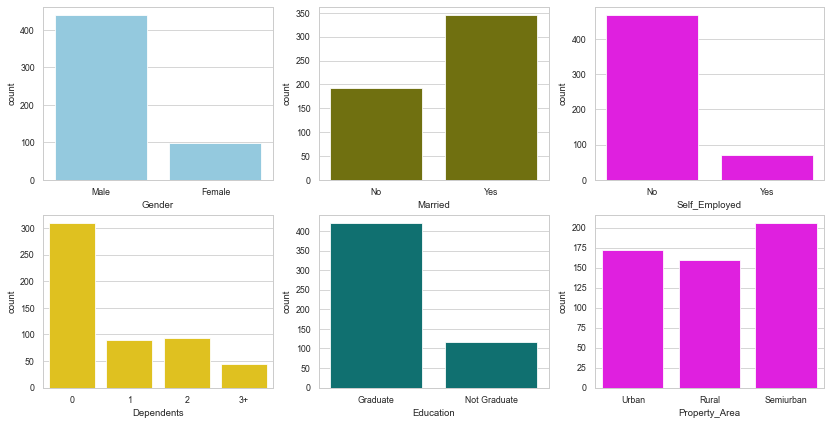

In [16]:
#Univariate Analysis - check distribution of categorical variables

f, axes = plt.subplots(2, 3, figsize=(14, 7))
sns.countplot( df["Gender"] , color="skyblue", ax=axes[0, 0])
sns.countplot( df["Married"] , color="olive", ax=axes[0, 1])
sns.countplot( df["Dependents"] , color="gold", ax=axes[1, 0])
sns.countplot( df["Education"] , color="teal", ax=axes[1, 1])
sns.countplot( df["Self_Employed"] , color="magenta", ax=axes[0, 2])
sns.countplot( df["Property_Area"] , color="magenta", ax=axes[1, 2])


#### Multivariate Analysis - check relationships among variables

<AxesSubplot:>

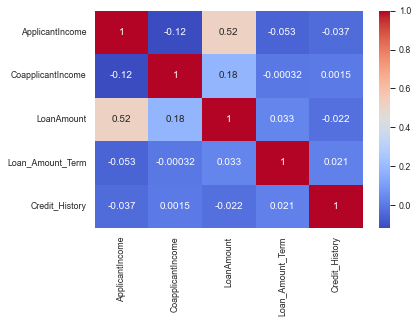

In [17]:
corrmat = df.corr()
sns.heatmap(corrmat,annot = True, cmap = 'coolwarm' )

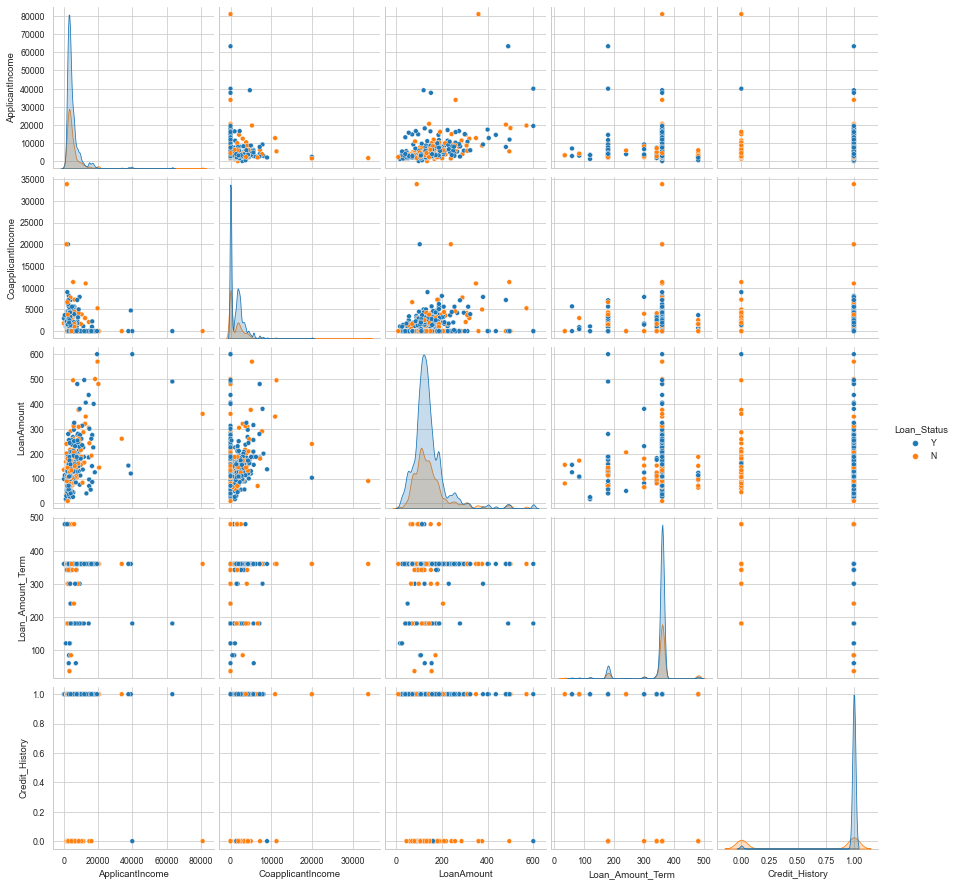

In [18]:
sns.pairplot(df, hue = 'Loan_Status', diag_kws={'bw': 0.1})

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

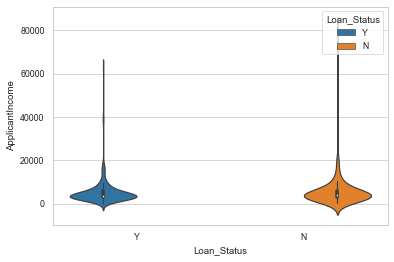

In [19]:
sns.violinplot(data = df, x = 'Loan_Status', y= 'ApplicantIncome', hue = 'Loan_Status', orient = 'v' )

<AxesSubplot:>

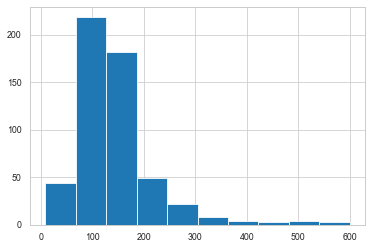

In [21]:
df.LoanAmount.hist()

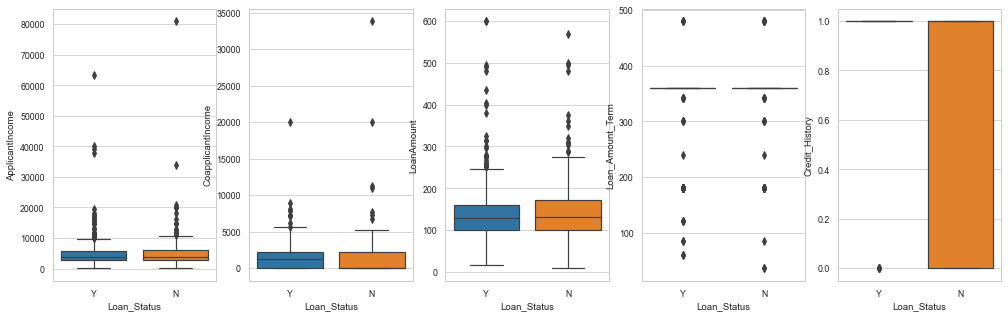

In [20]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
fig,axes = plt.subplots(1,5,figsize=(17,5))
for idx,num_col in enumerate(num_cols):
    sns.boxplot(y=num_col,data=df,x='Loan_Status',ax=axes[idx])


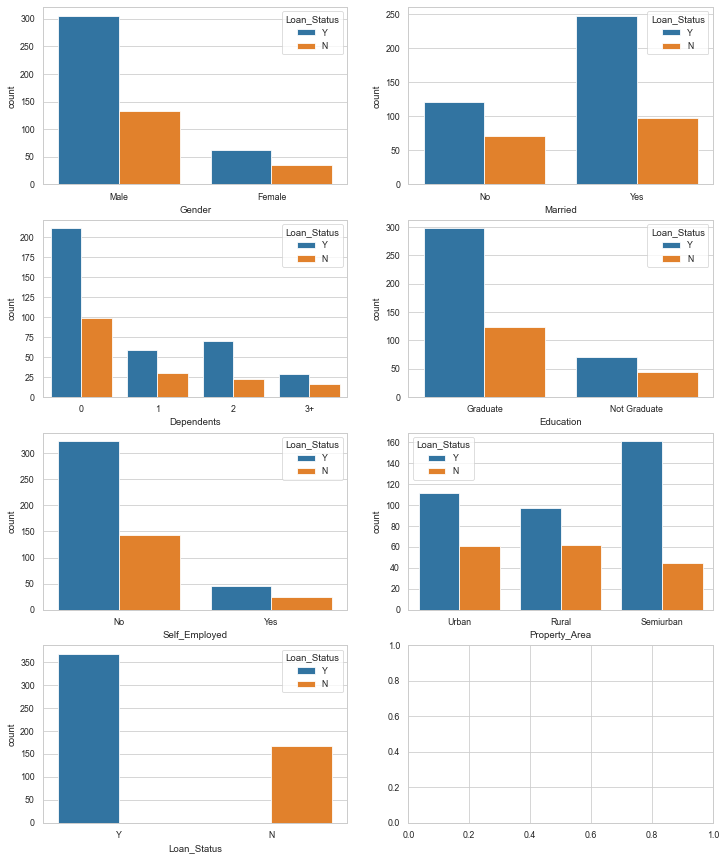

In [22]:
cat_cols = ['Gender','Married', 'Dependents','Education','Self_Employed','Property_Area','Loan_Status']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

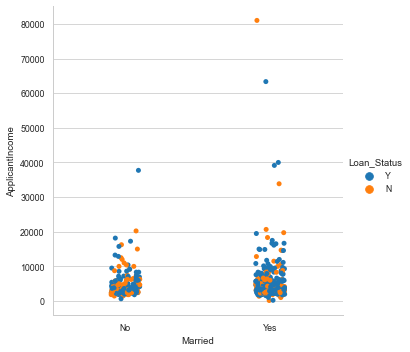

In [23]:
sns.catplot(data=df, x='Married',y = 'ApplicantIncome', hue ='Loan_Status')

#### Convert Categorical Columns to Numeric


In [24]:
#Convert nominal category columns to number
cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
df = pd.get_dummies(df,columns = cat_cols)

In [25]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,,,,,
LP001002,0,5849,0.0000,143.9440,360.0000,1.0000,0,1,1,0,1,0,1,0,0,0,1,0,1
LP001003,1,4583,1508.0000,128.0000,360.0000,1.0000,0,1,0,1,1,0,1,0,1,0,0,1,0
LP001005,0,3000,0.0000,66.0000,360.0000,1.0000,0,1,0,1,1,0,0,1,0,0,1,0,1
LP001006,0,2583,2358.0000,120.0000,360.0000,1.0000,0,1,0,1,0,1,1,0,0,0,1,0,1
LP001008,0,6000,0.0000,141.0000,360.0000,1.0000,0,1,1,0,1,0,1,0,0,0,1,0,1


In [26]:
#convert ordinal category columns to number

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['Dependents_ord'] = ord_enc.fit_transform(df[['Dependents']])

#Check encoding
df[["Dependents", "Dependents_ord"]].head(10)


,Dependents,Dependents_ord
Loan_ID,,
LP001002,0,0.0000
LP001003,1,1.0000
LP001005,0,0.0000
LP001006,0,0.0000
LP001008,0,0.0000
LP001011,2,2.0000
LP001013,0,0.0000
LP001014,3+,3.0000
LP001018,2,2.0000


In [27]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Dependents_ord
ApplicantIncome,1.0000,-0.1177,0.5196,-0.0526,-0.0370,-0.0464,0.0464,-0.0453,0.0453,0.1383,-0.1383,-0.1481,0.1481,0.0303,-0.0021,-0.0274,0.0314,-0.0314,0.0956
CoapplicantIncome,-0.1177,1.0000,0.1792,-0.0003,0.0015,-0.1536,0.1536,-0.1127,0.1127,0.0621,-0.0621,0.0105,-0.0105,0.0022,-0.0089,0.0071,0.0340,-0.0340,-0.0093
LoanAmount,0.5196,0.1792,1.0000,0.0327,-0.0221,-0.1049,0.1049,-0.1676,0.1676,0.1684,-0.1684,-0.1123,0.1123,0.0682,0.0193,-0.0868,0.0508,-0.0508,0.1474
Loan_Amount_Term,-0.0526,-0.0003,0.0327,1.0000,0.0211,0.0942,-0.0942,0.1090,-0.1090,0.0984,-0.0984,0.0266,-0.0266,0.0396,0.0445,-0.0851,0.0024,-0.0024,-0.0897
Credit_History,-0.0370,0.0015,-0.0221,0.0211,1.0000,-0.0164,0.0164,-0.0113,0.0113,0.0696,-0.0696,0.0223,-0.0223,-0.0230,0.0543,-0.0341,-0.5461,0.5461,-0.0470
Gender_Female,-0.0464,-0.1536,-0.1049,0.0942,-0.0164,1.0000,-1.0000,0.3617,-0.3617,0.0371,-0.0371,-0.0032,0.0032,-0.0847,0.1230,-0.0454,0.0451,-0.0451,-0.1845
Gender_Male,0.0464,0.1536,0.1049,-0.0942,0.0164,-1.0000,1.0000,-0.3617,0.3617,-0.0371,0.0371,0.0032,-0.0032,0.0847,-0.1230,0.0454,-0.0451,0.0451,0.1845
Married_No,-0.0453,-0.1127,-0.1676,0.1090,-0.0113,0.3617,-0.3617,1.0000,-1.0000,-0.0050,0.0050,0.0234,-0.0234,0.0268,-0.0052,-0.0208,0.0916,-0.0916,-0.3698
Married_Yes,0.0453,0.1127,0.1676,-0.1090,0.0113,-0.3617,0.3617,-1.0000,1.0000,0.0050,-0.0050,-0.0234,0.0234,-0.0268,0.0052,0.0208,-0.0916,0.0916,0.3698
Education_Graduate,0.1383,0.0621,0.1684,0.0984,0.0696,0.0371,-0.0371,-0.0050,0.0050,1.0000,-1.0000,-0.0151,0.0151,-0.0759,0.0605,0.0112,-0.0850,0.0850,-0.0332


In [28]:
to_drop = ['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Loan_Status_N','Dependents']
df.drop(to_drop, axis = 1, inplace = True)

In [30]:
## df.to_csv('Loans_Prep.csv')


### Build the Model


#### Split into Train and Test


In [31]:
#Separate the Features and the Target Variable
x = df.drop(["Loan_Status_Y"], axis=1)
y = df["Loan_Status_Y"]

In [32]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [33]:
#Check shape to make sure it is all in order
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((402, 14), (135, 14), (402,), (135,))

In [34]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit and Transform to the Train Set

In [35]:
x_train_scaled = scaler.fit_transform(x_train)

#Transform the Test Set
x_test_scaled = scaler.transform(x_test)

### Train the Model

**Logistic Regression**
C = Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.



In [36]:
#Instantiate the Algorithm 
logreg = LogisticRegression(C=1.0, class_weight="balanced", solver='liblinear', random_state=25)

#Train/Fit the model
logreg.fit(x_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=25, solver='liblinear')

In [37]:
#Check the Trained Model Coefficients
print(logreg.coef_)

[[-0.44797047 -0.4333446  -0.77636425 -0.28165929  2.91450979  0.39060355
   0.42736188  0.20298755 -0.70222272 -0.7667915  -0.91313234  0.07963253
  -0.63551441 -0.24185814]]


In [38]:
#Create a DataFrame for easy understanding. 1st Column will be Feature Names, 2nd column will be the Coef values

coef = pd.DataFrame(x_train.columns, columns=["Features"])

coef['Coef'] = logreg.coef_.reshape(-1,1)

#Optional: Sort Descending (highest value first) 
coef_sorted = coef.sort_values("Coef", ascending=False)

coef_sorted.head(10)

,Features,Coef
4,Credit_History,2.9145
6,Married_Yes,0.4274
5,Gender_Male,0.3906
7,Education_Graduate,0.2030
11,Property_Area_Semiurban,0.0796
13,Dependents_ord,-0.2419
3,Loan_Amount_Term,-0.2817
1,CoapplicantIncome,-0.4333
0,ApplicantIncome,-0.4480
12,Property_Area_Urban,-0.6355


In [39]:
#Make Predictions
y_pred = logreg.predict(x_test_scaled)

In [40]:
#Predict probabilities using the "predict_proba" function

y_prob = logreg.predict_proba(x_test_scaled)

y_prob

array([[0.42831164, 0.57168836],
       [0.20814084, 0.79185916],
       [0.94821759, 0.05178241],
       [0.45655109, 0.54344891],
       [0.42368542, 0.57631458],
       [0.32833481, 0.67166519],
       [0.32364925, 0.67635075],
       [0.95290054, 0.04709946],
       [0.19295107, 0.80704893],
       [0.38061841, 0.61938159],
       [0.37468741, 0.62531259],
       [0.27182293, 0.72817707],
       [0.20343662, 0.79656338],
       [0.36617951, 0.63382049],
       [0.37889842, 0.62110158],
       [0.3074068 , 0.6925932 ],
       [0.43591403, 0.56408597],
       [0.89337471, 0.10662529],
       [0.3800745 , 0.6199255 ],
       [0.84664821, 0.15335179],
       [0.38830606, 0.61169394],
       [0.32070771, 0.67929229],
       [0.36430872, 0.63569128],
       [0.93431781, 0.06568219],
       [0.36744445, 0.63255555],
       [0.2153313 , 0.7846687 ],
       [0.40723802, 0.59276198],
       [0.89513637, 0.10486363],
       [0.22798071, 0.77201929],
       [0.40903554, 0.59096446],
       [0.

In [41]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(135, 2)

In [42]:
#Create a DataFrame
y_prob_df = pd.DataFrame(y_prob, index=x_test.index)

In [43]:
y_prob_df.head()

,0,1
Loan_ID,,
LP002740,0.4283,0.5717
LP001310,0.2081,0.7919
LP002277,0.9482,0.0518
LP002582,0.4566,0.5434
LP001784,0.4237,0.5763


In [44]:
#Put all information on a DataFrame for analysis

#Copy original test data
df_results = x_test.copy()

#Add actual, predicted, and predicted probability results

df_results["Predicted_Prob_0"] = y_prob_df[0]
df_results["Predicted_Prob_1"] = y_prob_df[1]
df_results["Actual_Class"] = y_test
df_results["Predicted_Class"] = y_pred

labels = logreg.classes_

In [45]:
df_results.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_ord,Predicted_Prob_0,Predicted_Prob_1,Actual_Class,Predicted_Class
Loan_ID,,,,,,,,,,,,,,,,,,
LP002740,6417,0.0000,157.0000,180.0000,1.0000,1,1,1,1,0,1,0,0,3.0000,0.4283,0.5717,1,1
LP001310,5695,4167.0000,175.0000,360.0000,1.0000,1,1,1,1,0,0,1,0,0.0000,0.2081,0.7919,1,1
LP002277,3180,0.0000,71.0000,360.0000,0.0000,0,0,1,1,0,0,0,1,0.0000,0.9482,0.0518,0,0
LP002582,17263,0.0000,225.0000,360.0000,1.0000,0,0,0,0,1,0,1,0,0.0000,0.4566,0.5434,1,1
LP001784,5500,1260.0000,170.0000,360.0000,1.0000,1,1,1,1,0,1,0,0,1.0000,0.4237,0.5763,1,1


### CLASSIFICATION METRICS

In [46]:
#Classification Metrics
from sklearn import metrics

#### Confusion Matrix

##### DataFrame

In [47]:
#Get the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=labels)

#Put in DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

#View the DataFrame
cm_df

,0,1
0,22,16
1,11,86


Text(0.5, 23.700000000000003, 'Predicted label')

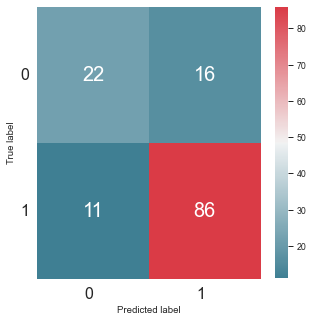

In [48]:
#Plot the confusion matrix for easier viewing

#Plot Attributes
fig = plt.figure(figsize= (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap - PASS YOUR CONFUSION MATRIX DATAFRAME HERE
heatmap = sns.heatmap(cm_df,annot=True,annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Accuracy

In [49]:
#Accuracy Rate
accuracy = metrics.accuracy_score(y_test,y_pred)

#Print accuracy 
print("Accuracy Rate: %.2f" % (accuracy * 100))


Accuracy Rate: 80.00


#### Error

In [50]:
#Error Rate
error = 1 - accuracy

#Print Error
print("Error Rate: %.2f" % (error * 100))

Error Rate: 20.00


#### Precision

In [51]:
precision = metrics.precision_score(y_test,y_pred,labels=labels, average=None)

precision_df = pd.DataFrame(precision, index=labels, columns=['Precision'])

precision_df


,Precision
0,0.6667
1,0.8431


#### Recall

In [52]:
recall = metrics.recall_score(y_test,y_pred,labels=labels, average=None)

recall_df = pd.DataFrame(recall, index=labels, columns=['Recall'])

recall_df

,Recall
0,0.5789
1,0.8866


#### F1 Score


In [53]:
f1 = metrics.f1_score(y_test,y_pred,labels=labels, average=None)

f1_df = pd.DataFrame(f1, index=labels, columns=['F1'])

f1_df

,F1
0,0.6197
1,0.8643


#### Classification Report


In [54]:
classification_report = metrics.classification_report(y_test,y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.67      0.58      0.62        38
           1       0.84      0.89      0.86        97

    accuracy                           0.80       135
   macro avg       0.75      0.73      0.74       135
weighted avg       0.79      0.80      0.80       135



In [55]:
#Predict the Probabilities

predict_proba_1 = df_results["Predicted_Prob_1"]

In [56]:
#Calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba_1)

In [57]:
#Calculate the AUC
roc_auc = metrics.roc_auc_score(y_test,predict_proba_1)

print("AUC: %.2f" % (roc_auc))

AUC: 0.78


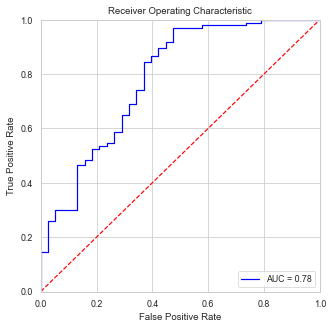

In [58]:
#Plot the AUC-ROC Curve
#Plot Attributes
fig = plt.figure(figsize= (5,5))

#Plot Title
plt.title('Receiver Operating Characteristic')

#Plot Function
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()